In [1]:
import seaborn as sns

In [2]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("HADS_StudentFactors.csv")

In [4]:
df.head()

,StudentID,Gender,Height,Weight,Age,Living with Family Encoded,Peer Pressure Encoded,Past History Encoded,Smoke Encoded,IQScore,education_G,education_PG,education_S,Current Education,Exercise_Encoded,Exercise,Sum,Result,Result_Encoded
0,10165,M,4.9,42.0,27.0,0,1,1,1,90.0,0,1,0,PG,0.0,None,16,Abnormal,2
1,10281,M,5.6,69.0,27.0,0,1,1,1,93.0,0,1,0,PG,0.0,None,16,Abnormal,2
2,11574,M,5.3,40.0,18.0,1,0,1,1,99.0,1,0,0,G,0.0,None,17,Abnormal,2
3,12296,F,4.5,71.0,25.0,0,0,0,1,96.0,0,1,0,PG,0.0,None,9,Borderline,1
4,12434,F,5.5,80.0,13.0,1,0,1,0,89.0,0,0,1,S,2.0,Heavy,5,Normal,0


In [5]:
df.dtypes

StudentID                       int64
Gender                         object
Height                        float64
Weight                        float64
Age                           float64
Living with Family Encoded      int64
Peer Pressure Encoded           int64
Past History Encoded            int64
Smoke Encoded                   int64
IQScore                       float64
education_G                     int64
education_PG                    int64
education_S                     int64
Current Education              object
Exercise_Encoded              float64
Exercise                       object
Sum                             int64
Result                         object
Result_Encoded                  int64
dtype: object

In [45]:
# # df["Living with Family"].value_counts()
# df["Living with Family"] = df["Living with Family"].astype('category')
# df["Living with Family Encoded"] = df["Living with Family"].cat.codes
# df.head()


In [46]:
# df['Peer Pressure'] = df['Peer Pressure'].astype('category')
# df['Peer Pressure Encoded'] = df['Peer Pressure'].cat.codes
# df['Past History'] = df['Past History'].astype('category')
# df['Past History Encoded'] = df['Past History'].cat.codes
# df['Smoke'] = df['Smoke'].astype('category')
# df['Smoke Encoded'] = df['Smoke'].cat.codes
# df.head()


In [29]:
df['Current Education'] = pd.Categorical(df['Current Education'])
dfDummies = pd.get_dummies(df['Current Education'], prefix = 'education')
df = pd.concat([df, dfDummies], axis=1)
df.head()

,StudentID,Gender,Height,Weight,Age,Living with Family Encoded,Peer Pressure Encoded,Past History Encoded,Smoke Encoded,IQScore,Current Education,Exercise,Sum,Result,education_G,education_PG,education_S
0,10165,M,4.9,42.0,27.0,0,1,1,1,90.0,PG,None,16,Abnormal,0,1,0
1,10281,M,5.6,69.0,27.0,0,1,1,1,93.0,PG,None,16,Abnormal,0,1,0
2,11574,M,5.3,40.0,18.0,1,0,1,1,99.0,G,None,17,Abnormal,1,0,0
3,12296,F,4.5,71.0,25.0,0,0,0,1,96.0,PG,None,9,Borderline,0,1,0
4,12434,F,5.5,80.0,13.0,1,0,1,0,89.0,S,Heavy,5,Normal,0,0,1


In [30]:
df.to_csv("HADS_StudentFactors.csv")

In [47]:
size_mapping = {'Normal':0,'Borderline':1,'Abnormal':2}
df['Result_Encoded'] = df['Result'].map(size_mapping)


In [49]:
size_mapping = {'None':0,'Moderate':1,'Heavy':2}
df['Exercise_Encoded'] = df['Exercise'].map(size_mapping)


In [8]:
# df.to_csv("HADS_StudentFactors.csv")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

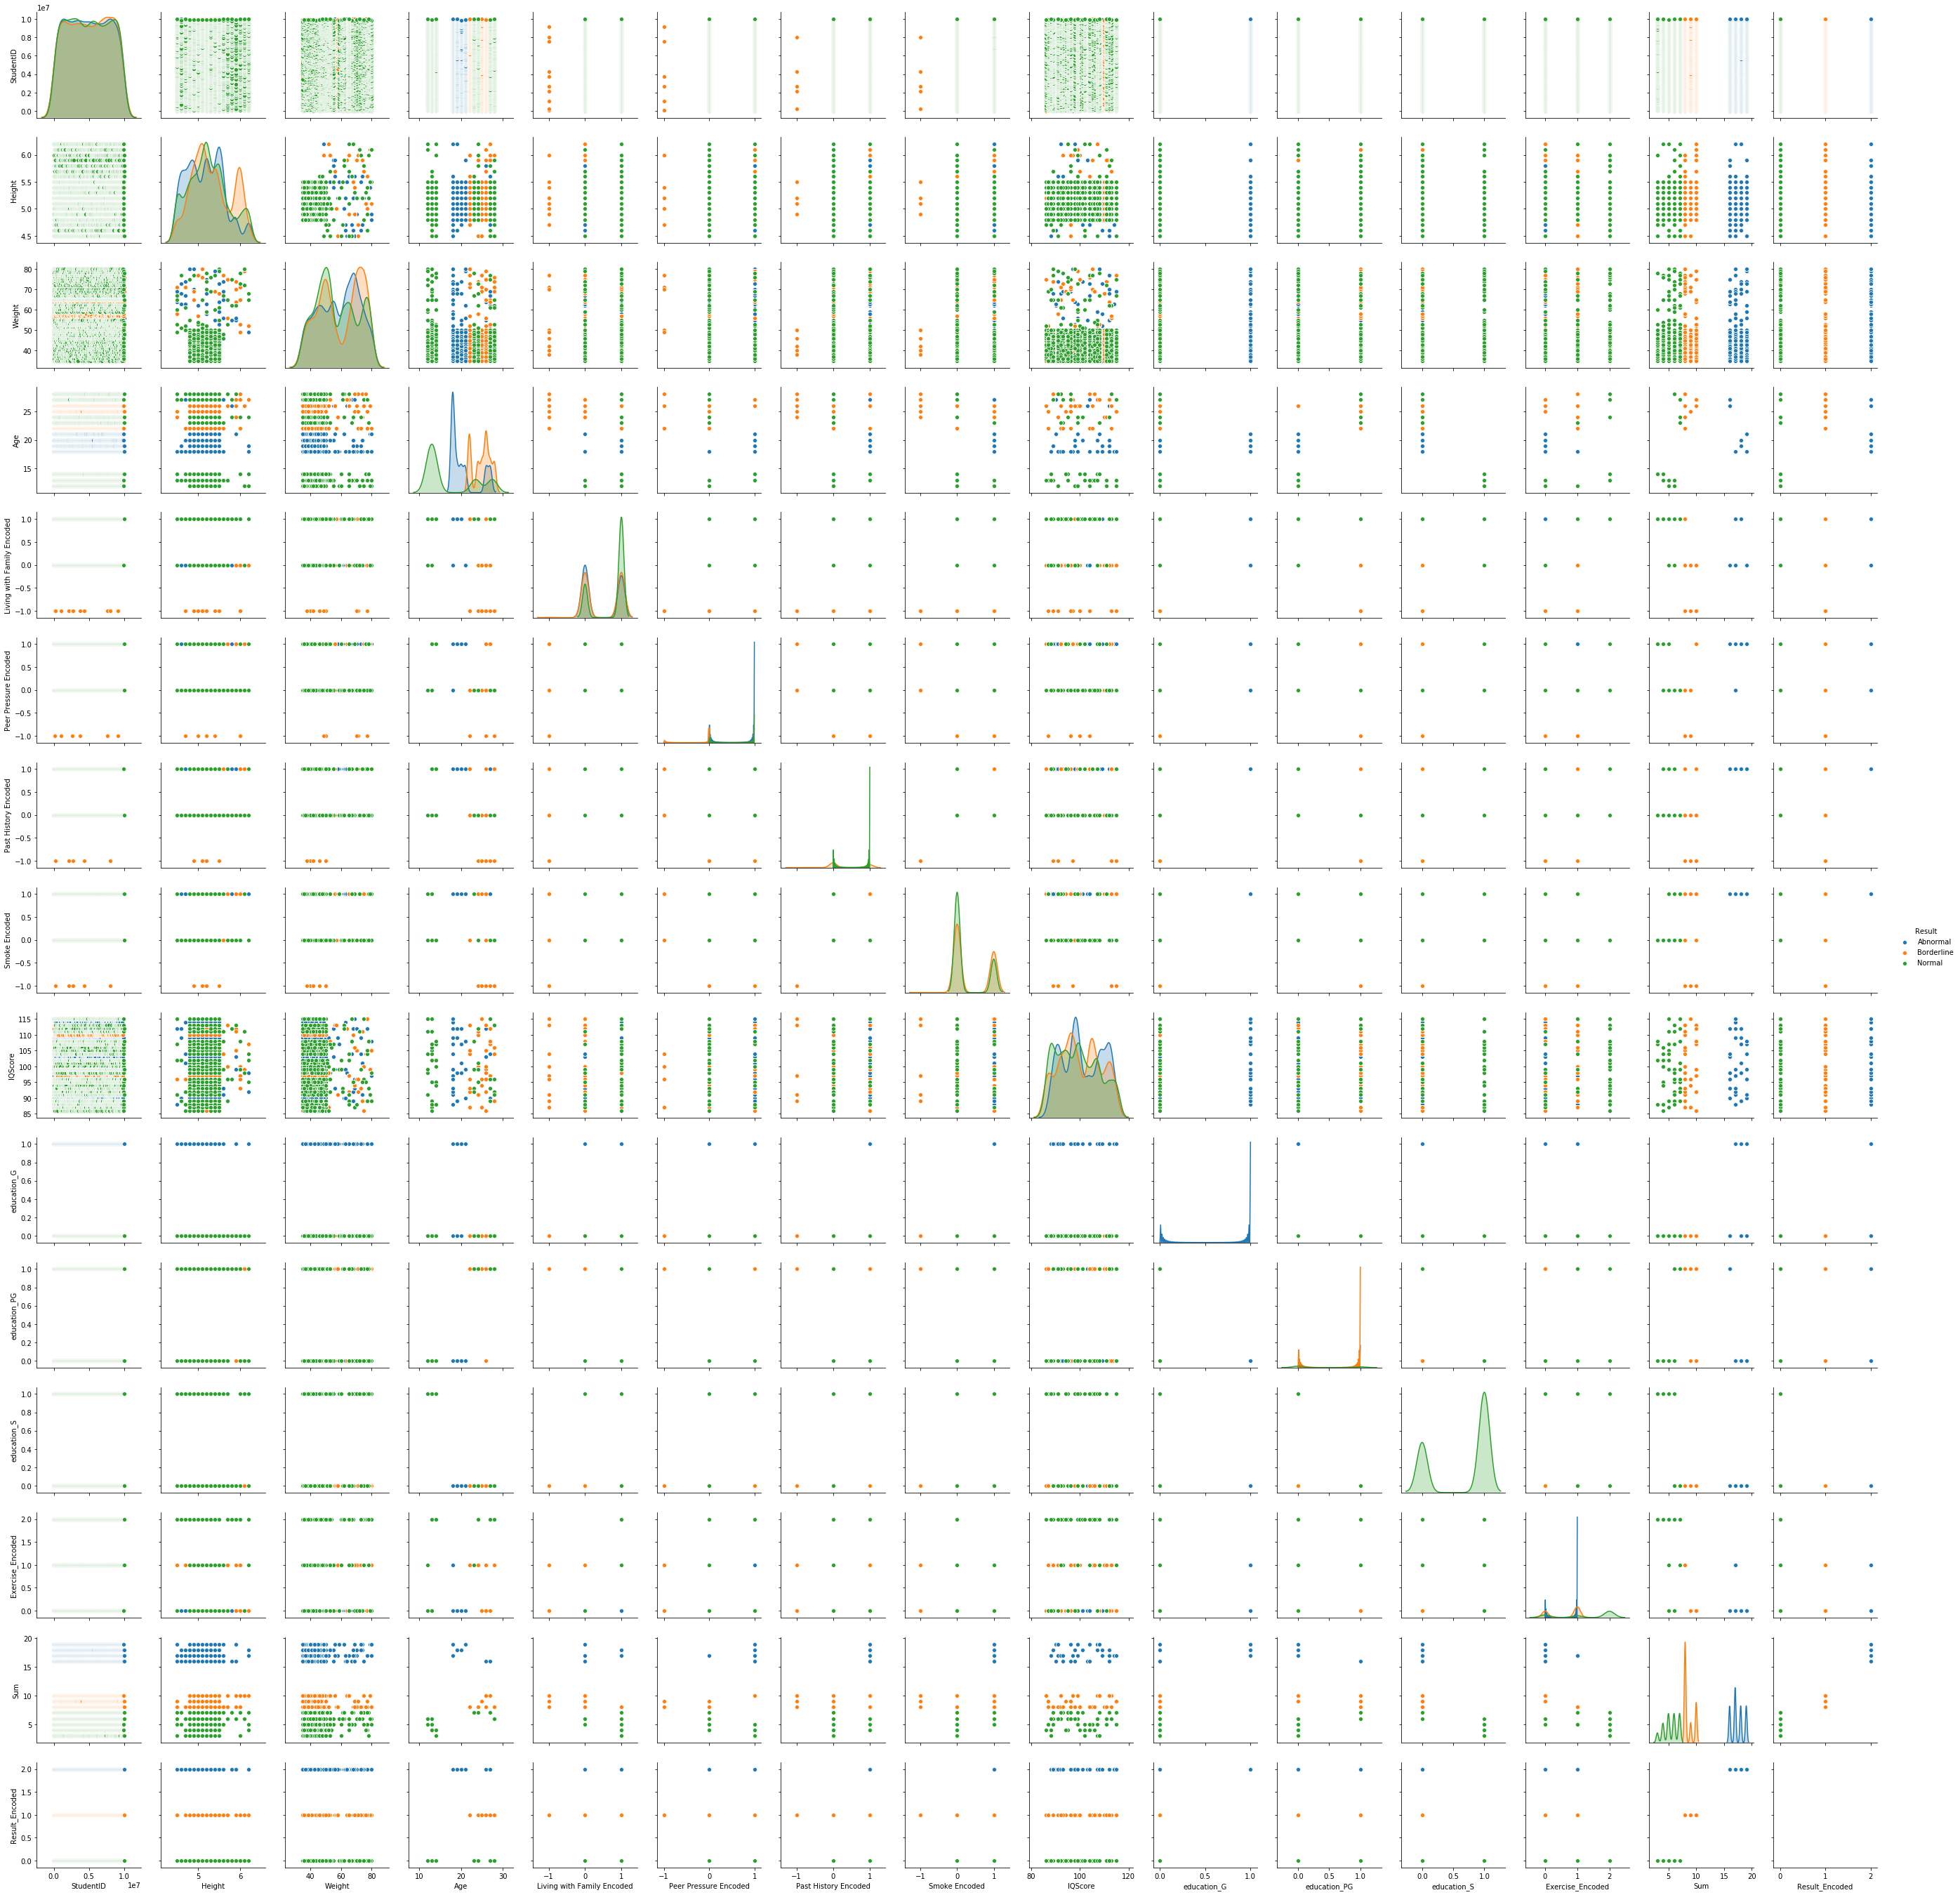

In [7]:
sns.pairplot(df,hue="Result").savefig("pairplot.png")

In [56]:
# sns_plot.savefig("output.png")

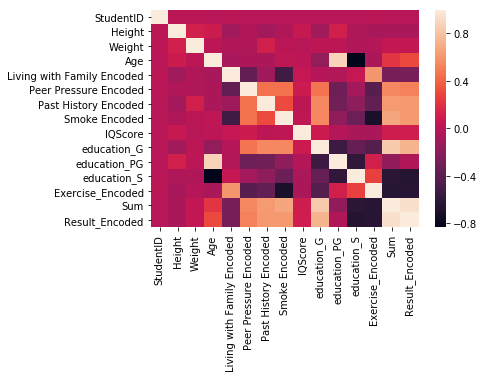

In [6]:
sns.heatmap(df.corr())

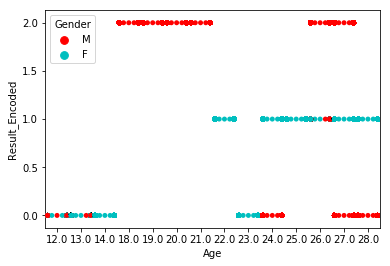

In [4]:
sns.swarmplot(x="Age", y="Result_Encoded", hue="Gender",
              palette=["r", "c", "y"], data=df)